# Arbeit mit dem Ford-A Datenset

In [1]:
!pip install sktime
!pip install --upgrade tsfresh
import numpy as np
import sklearn.ensemble as ensemble
import sklearn.neighbors as neighbors
import sklearn.gaussian_process as gp
import sklearn.svm as svm
import sklearn.neural_network as nn
from sklearn.metrics import accuracy_score, confusion_matrix

import time
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

Requirement already up-to-date: tsfresh in /usr/local/lib/python3.7/dist-packages (0.18.0)


## Visualisierung

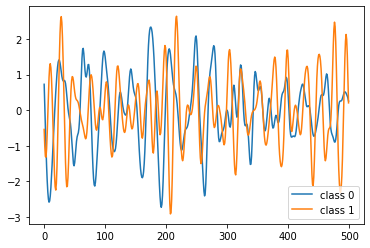

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[1], label="class " + str(c))
    
plt.legend(loc="best")
plt.show()
plt.close()

## Naive Kodierung = Jeder Zeitreihenpunkt als ein Feature

In [3]:
all_classifier = [
    ensemble.RandomForestClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    neighbors.KNeighborsClassifier(),
    nn.MLPClassifier(), 
]
X_train, X_test = x_train, x_test
for clf in all_classifier:
    print(f"Beginne training mit {clf}")
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Genauigkeit von {clf}: {accuracy}")
    print(conf_matrix)

Beginne training mit RandomForestClassifier()
Genauigkeit von RandomForestClassifier(): 0.7310606060606061
[[532 149]
 [206 433]]
Beginne training mit AdaBoostClassifier()
Genauigkeit von AdaBoostClassifier(): 0.5068181818181818
[[383 298]
 [353 286]]
Beginne training mit GradientBoostingClassifier()
Genauigkeit von GradientBoostingClassifier(): 0.6651515151515152
[[507 174]
 [268 371]]
Beginne training mit KNeighborsClassifier()
Genauigkeit von KNeighborsClassifier(): 0.7196969696969697
[[536 145]
 [225 414]]
Beginne training mit MLPClassifier()
Genauigkeit von MLPClassifier(): 0.8113636363636364
[[544 137]
 [112 527]]


## Feature-Transformationen

In [3]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
# for the sktime interface to work, we need another dimension to indicate 
# that we have one feature 
X_train = np.expand_dims(x_train, axis = 1)
X_test = np.expand_dims(x_test, axis=1)

transformer = TSFreshFeatureExtractor(default_fc_parameters="minimal")
extracted_features = transformer.fit_transform(X_train)
extracted_features.head()

Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


,var_0__sum_values,var_0__median,var_0__mean,var_0__length,var_0__standard_deviation,var_0__variance,var_0__root_mean_square,var_0__maximum,var_0__minimum
0,-2.831000e-07,-0.030960,-5.662000e-10,500.0,0.999000,0.998,0.999000,2.326837,-2.136033
1,-2.360000e-08,0.035526,-4.720000e-11,500.0,0.998999,0.998,0.998999,2.358892,-2.445772
2,-1.189290e-06,0.076201,-2.378580e-09,500.0,0.998999,0.998,0.998999,2.335813,-2.729947
3,4.713900e-07,0.011714,9.427800e-10,500.0,0.999000,0.998,0.999000,2.562245,-3.179336
4,-2.094000e-07,0.092380,-4.188000e-10,500.0,0.999000,0.998,0.999000,2.933311,-4.077337


In [4]:
extracted_features.shape

(3601, 9)

## Vorgefertigte Klassifikatoren

In [9]:
from sktime.classification.interval_based import RandomIntervalSpectralForest

rise = RandomIntervalSpectralForest(n_estimators=10)
rise.fit(X_train, y_train)
rise.score(X_test, y_test)

0.8984848484848484